In [2]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 0.5/124.9 MB 6.3 MB/s eta 0:00:20
   ---------------------------------------- 1.0/124.9 MB 7.5 MB/s eta 0:00:17
   ---------------------------------------- 1.4/124.9 MB 7.9 MB/s eta 0:00:16
    --------------------------------------- 1.8/124.9 MB 8.0 MB/s eta 0:00:16
    --------------------------------------- 2.1/124.9 MB 8.0 MB/s eta 0:00:16
    --------------------------------------- 2.5/124.9 MB 8.0 MB/s eta 0:00:16
    --------------------------------------- 2.9/124.9 MB 8.1 MB/s eta 0:00:16
   - -------------------------------------- 3.3/124.9 MB 8.1 MB/s eta 0:00:16
   - -------------------------------------- 3.7/124.9 MB 8.1 MB/s eta 0:00:15
   - -------------------------------------- 4.1/124.9 MB 8.1 MB/s eta 0:00:15
   - -------------------------------------- 4.5/124.9 MB 8.1 MB/s eta 0

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score,classification_report, confusion_matrix, precision_score, recall_score


In [5]:
data = pd.read_csv('./dataset/oth_dataset.csv')

# EDA (exploratory data analysis)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [7]:
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [8]:
data.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [9]:
# no. of null values in columns
nalist = pd.Series((data.isnull().sum()[data.isnull().any()].sort_values(ascending = False)))
nalist

CONTENT_LENGTH        812
WHOIS_STATEPRO        362
WHOIS_COUNTRY         306
SERVER                176
WHOIS_UPDATED_DATE    139
WHOIS_REGDATE         127
CHARSET                 7
DNS_QUERY_TIMES         1
dtype: int64

# Data cleaning

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
# formatting date to YYYY-MM-DD format
def format_date(date_str):
    # Проверяем, является ли значение пустым или NaN
    if date_str in [None, np.nan, "b", "0", "None"]:
        return np.nan
    
    # Разделяем дату и время, если они разделены символом "T"
    if "T" in date_str:
        split_datetime = date_str.split("T")
    else:
        split_datetime = date_str.split()
    
    # Извлекаем только дату
    date_part = split_datetime[0]
    
    # Преобразуем дефисы в косые черты для соответствия формату "день/месяц/год"
    formatted_date = date_part.replace("-", "/")
    
    return formatted_date

In [12]:
data.WHOIS_REGDATE = data.WHOIS_REGDATE.apply(format_date)
data.WHOIS_REGDATE = pd.to_datetime(data.WHOIS_REGDATE, format="%d/%m/%Y", errors="coerce")

In [13]:
data.WHOIS_REGDATE.value_counts(dropna=False).sort_index()

WHOIS_REGDATE
1990-07-26      1
1990-12-12      4
1992-01-10      1
1992-02-21      2
1993-06-03      2
             ... 
2017-02-13      1
2017-03-11      1
2017-03-22      1
2017-04-14      1
NaT           135
Name: count, Length: 870, dtype: int64

In [14]:
data["WHOIS_UPDATED_DATE"] = data["WHOIS_UPDATED_DATE"].apply(format_date)
data["WHOIS_UPDATED_DATE"] = pd.to_datetime(data["WHOIS_UPDATED_DATE"], format="%d/%m/%Y", errors="coerce")

data["WHOIS_UPDATED_DATE"].value_counts(dropna=False).sort_index()

WHOIS_UPDATED_DATE
2008-07-14      1
2008-12-13      1
2009-06-02      1
2009-09-30      1
2011-07-20      1
             ... 
2017-04-26      1
2017-04-27      4
2017-04-28      7
2017-04-29      2
NaT           144
Name: count, Length: 529, dtype: int64

In [15]:
data.isnull().sum().sort_values(ascending = False)

CONTENT_LENGTH               812
WHOIS_STATEPRO               362
WHOIS_COUNTRY                306
SERVER                       176
WHOIS_UPDATED_DATE           144
WHOIS_REGDATE                135
CHARSET                        7
DNS_QUERY_TIMES                1
URL                            0
SOURCE_APP_PACKETS             0
APP_PACKETS                    0
REMOTE_APP_BYTES               0
SOURCE_APP_BYTES               0
REMOTE_APP_PACKETS             0
TCP_CONVERSATION_EXCHANGE      0
APP_BYTES                      0
REMOTE_IPS                     0
DIST_REMOTE_TCP_PORT           0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
Type                           0
dtype: int64

In [16]:
# replacing nan values with median

data["CONTENT_LENGTH"] = data["CONTENT_LENGTH"].fillna(data["CONTENT_LENGTH"].median())
data["WHOIS_REGDATE"] = data["WHOIS_REGDATE"].fillna(data["WHOIS_REGDATE"].median())
data["WHOIS_UPDATED_DATE"] = data["WHOIS_UPDATED_DATE"].fillna(data["WHOIS_UPDATED_DATE"].median())

In [17]:
data.shape

(1781, 21)

In [18]:
# dropping rows with nan values for these 2 columns

data = data.dropna(subset=['SERVER'])
data = data.dropna(subset=['DNS_QUERY_TIMES'])

In [19]:
data.shape

(1604, 21)

### Scaling features

In [20]:
columns_to_scale  = ["CONTENT_LENGTH", "WHOIS_REGDATE", "WHOIS_UPDATED_DATE", "DNS_QUERY_TIMES",
                     "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "TCP_CONVERSATION_EXCHANGE",
                     "DIST_REMOTE_TCP_PORT", "REMOTE_IPS", "APP_BYTES", "SOURCE_APP_PACKETS",
                     "REMOTE_APP_PACKETS", "SOURCE_APP_BYTES", "REMOTE_APP_BYTES",
                     "APP_PACKETS"]

data["WHOIS_REGDATE"] = data["WHOIS_REGDATE"].astype("int64")
data["WHOIS_UPDATED_DATE"] = data["WHOIS_UPDATED_DATE"].astype("int64")

sc = StandardScaler()

#scaling to mean = 0 and sd = 1
scaled_columns = sc.fit_transform(data[columns_to_scale])
data[columns_to_scale] = scaled_columns

data[columns_to_scale].head()

,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DNS_QUERY_TIMES,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS
0,-0.283979,2.589396,0.333190,-0.066028,-1.485550,-0.926963,-0.215960,-0.231464,-0.305904,-0.040199,-0.215470,-0.178805,-0.210255,-0.040806,-0.215470
1,0.348710,-0.262823,0.333190,-0.779219,-1.485550,-1.147891,0.025064,0.096057,0.293205,-0.031221,-0.027214,0.012256,-0.208612,-0.034064,-0.027214
2,-0.281376,-0.262823,0.333190,-0.779219,-1.485550,-1.147891,-0.384676,-0.231464,-0.905013,-0.052056,-0.427258,-0.391095,-0.227172,-0.054898,-0.427258
3,-0.288290,-0.895472,-2.565208,2.073544,-1.449576,-1.147891,0.362497,0.797886,-0.006350,0.012514,0.490489,0.394378,0.048432,0.019291,0.490489
5,-0.216118,2.747294,0.443631,-0.779219,-1.413601,-0.926963,-0.119550,0.049268,1.790977,-0.036913,-0.168406,-0.115118,-0.214877,-0.039755,-0.168406


### Formatting categorical values

In [21]:
data["CHARSET"].value_counts()

CHARSET
UTF-8           647
utf-8           340
ISO-8859-1      338
us-ascii        141
iso-8859-1      129
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64

In [22]:
def charset_cleaner(charset):
    if charset not in ['UTF-8','ISO-8859-1','utf-8','us-ascii','iso-8859-1']:
        return "other" 
    else:
        return charset.lower()

data.CHARSET = data.CHARSET.apply(charset_cleaner)

data.CHARSET.value_counts()

CHARSET
utf-8         987
iso-8859-1    467
us-ascii      141
other           9
Name: count, dtype: int64

In [23]:
data["SERVER"].value_counts()

SERVER
Apache                                                       385
nginx                                                        211
Microsoft-HTTPAPI/2.0                                        113
cloudflare-nginx                                              94
Microsoft-IIS/7.5                                             51
                                                            ... 
mw2103.codfw.wmnet                                             1
Apache/2.4.25 (Debian)                                         1
ECD (fll/0790)                                                 1
Apache/2.4.25 (FreeBSD) OpenSSL/1.0.1s-freebsd PHP/5.6.30      1
Apache/2.2.16 (Debian)                                         1
Name: count, Length: 238, dtype: int64

In [24]:
servers_list = ['Apache', 'nginx', 'Microsoft', 'ATS', 'Server', 'GSE', 'YouTubeFrontEnd']

def server_cleaner(server_name):
    for name in servers_list:
        if name.lower() in server_name.lower():
            return name
    return "other"

In [25]:
data["SERVER"] = data["SERVER"].apply(server_cleaner)
data["SERVER"].value_counts()

SERVER
Apache             642
nginx              436
Microsoft          198
other              144
Server              61
GSE                 49
YouTubeFrontEnd     42
ATS                 32
Name: count, dtype: int64

In [26]:
data["WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
US                963
CA                 75
ES                 63
AU                 34
PA                 21
GB                 17
JP                 11
UK                 10
CN                 10
IN                 10
CZ                  9
FR                  8
CH                  6
[u'GB'; u'UK']      5
NL                  5
PH                  4
BS                  4
KR                  4
ru                  4
AT                  4
HK                  3
us                  3
TR                  3
BE                  3
DE                  3
SC                  3
SE                  3
KY                  3
UY                  2
Cyprus              2
NO                  2
UA                  2
KG                  2
SI                  2
BR                  2
RU                  2
IL                  2
se                  1
United Kingdom      1
UG                  1
PK                  1
IT                  1
BY                  1
AE                  1
IE                

In [27]:
common_countries = data.WHOIS_COUNTRY.value_counts()[data.WHOIS_COUNTRY.value_counts() >= 10].index.to_list()

common_countries

['US', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'UK', 'CN', 'IN']

In [28]:
def country_cleaner(country):
    if country == "[u'GB'; u'UK']" or country == "UK" or country == "United Kingdom":
        return "GB"
    elif country in common_countries:
        return country
    else:
        return "other"

data["WHOIS_COUNTRY"] = data["WHOIS_COUNTRY"].apply(country_cleaner)
data["WHOIS_COUNTRY"].value_counts()

WHOIS_COUNTRY
US       963
other    384
CA        75
ES        63
AU        34
GB        33
PA        21
JP        11
IN        10
CN        10
Name: count, dtype: int64

In [29]:
data["WHOIS_STATEPRO"].value_counts()

WHOIS_STATEPRO
CA            295
NY             69
Barcelona      62
WA             56
Arizona        55
             ... 
New Jersey      1
Alicante        1
SK              1
TR              1
bc              1
Name: count, Length: 176, dtype: int64

In [30]:
replace_dict = {'Texas':'TX', 'TEXAS':'TX', 'New York':'NY', 'NEW YORK':'NY','Utah':'UT', 'UTAH':'UT','ut':'UT', 'Virginia':'VA','VIRGINIA':'VA', 'va':'VA',
               'Washington':'WA', 'wa':'WA', 'WASHINGTON':'WA', 'Illinois':'IL', 'ILLINOIS':'IL', 'il':'IL', 'Missouri':'MO', 'MISSOURI':'MO', 'mo':'MO',
                'FLORIDA':'FL', 'Florida':'FL', 'fl':'FL', 'Pennsylvania':'PA', 'PENNSYLVANIA':'PA', 'pa':'PA','Oregon':'OR', 'OREGON':'OR', 'or':'OR',
               'Kansas':'KS', 'KANSAS':'KS', 'ks':'KS', 'WC1N':'WI', 'Wiscosnin':'WI', 'WISCONSIN':'WI','wi':'WI', 'British Columbia':'BC','bc':'BC',
               'New Jersey':'NJ', 'nj':'NJ', 'NEW JERSEY':'NJ', 'ca':'CA', 'California':'CA','CALIFORNIA':'CA', 'Ontario':'ON', 'ONTARIO':'ON', 'on':'ON',
               'Arizona':'AZ','ARIZONA':'AZ', 'az':'AZ', 'Ohio':'OH','OHIO':'OH','oh':'OH'}

In [31]:
data['WHOIS_STATEPRO'] = data['WHOIS_STATEPRO'].replace(replace_dict)
data.WHOIS_STATEPRO.value_counts()

WHOIS_STATEPRO
CA           346
NY            81
WA            66
Barcelona     62
AZ            60
            ... 
SK             1
TR             1
RIX            1
WV             1
QUEBEC         1
Name: count, Length: 147, dtype: int64

In [32]:
common_states = data["WHOIS_STATEPRO"].value_counts()[data["WHOIS_STATEPRO"].value_counts() > 5].index.to_list()
 
common_states

['CA',
 'NY',
 'WA',
 'Barcelona',
 'AZ',
 'FL',
 'ON',
 'UT',
 'NV',
 'IL',
 'PA',
 'MA',
 'CO',
 'OH',
 'MO',
 'PANAMA',
 'VA',
 'NJ',
 'TX',
 'Queensland',
 'UK',
 'Quebec',
 'PRAHA',
 'DC',
 'BC',
 'GA',
 'MI',
 'KS',
 'WI',
 'OR',
 'DE']

In [33]:
def state_cleaner(state):
    if state not in common_states:
        return "other"
    else:
        return state

data["WHOIS_STATEPRO"] = data["WHOIS_STATEPRO"].apply(state_cleaner)

data["WHOIS_STATEPRO"].value_counts()

WHOIS_STATEPRO
other         511
CA            346
NY             81
WA             66
Barcelona      62
AZ             60
FL             59
ON             45
UT             44
NV             30
IL             26
PA             26
MA             22
CO             22
OH             21
MO             21
PANAMA         19
VA             18
NJ             17
TX             16
Queensland     14
UK              8
PRAHA           8
BC              8
Quebec          8
DC              8
GA              7
MI              7
DE              6
WI              6
KS              6
OR              6
Name: count, dtype: int64

In [34]:
data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,-1.485550,-0.926963,iso-8859-1,nginx,-0.283979,other,other,2.589396,0.333190,...,-0.231464,-0.305904,-0.040199,-0.215470,-0.178805,-0.210255,-0.040806,-0.215470,-0.066028,1
1,B0_2314,-1.485550,-1.147891,utf-8,Apache,0.348710,other,other,-0.262823,0.333190,...,0.096057,0.293205,-0.031221,-0.027214,0.012256,-0.208612,-0.034064,-0.027214,-0.779219,0
2,B0_911,-1.485550,-1.147891,us-ascii,Microsoft,-0.281376,other,other,-0.262823,0.333190,...,-0.231464,-0.905013,-0.052056,-0.427258,-0.391095,-0.227172,-0.054898,-0.427258,-0.779219,0
3,B0_113,-1.449576,-1.147891,iso-8859-1,nginx,-0.288290,US,other,-0.895472,-2.565208,...,0.797886,-0.006350,0.012514,0.490489,0.394378,0.048432,0.019291,0.490489,2.073544,0
5,B0_2064,-1.413601,-0.926963,utf-8,nginx,-0.216118,other,other,2.747294,0.443631,...,0.049268,1.790977,-0.036913,-0.168406,-0.115118,-0.214877,-0.039755,-0.168406,-0.779219,0


## One-hot encoding

In [35]:
categorical_columns = ["CHARSET", "SERVER", "WHOIS_COUNTRY", "WHOIS_STATEPRO"]

In [36]:
for col in categorical_columns:
    data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
    data.drop(columns=[col], inplace=True)

data.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,...,WHOIS_STATEPRO_PRAHA,WHOIS_STATEPRO_Quebec,WHOIS_STATEPRO_Queensland,WHOIS_STATEPRO_TX,WHOIS_STATEPRO_UK,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_VA,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WI,WHOIS_STATEPRO_other
0,M0_109,-1.485550,-0.926963,-0.283979,2.589396,0.333190,-0.215960,-0.231464,-0.305904,-0.040199,...,False,False,False,False,False,False,False,False,False,True
1,B0_2314,-1.485550,-1.147891,0.348710,-0.262823,0.333190,0.025064,0.096057,0.293205,-0.031221,...,False,False,False,False,False,False,False,False,False,True
2,B0_911,-1.485550,-1.147891,-0.281376,-0.262823,0.333190,-0.384676,-0.231464,-0.905013,-0.052056,...,False,False,False,False,False,False,False,False,False,True
3,B0_113,-1.449576,-1.147891,-0.288290,-0.895472,-2.565208,0.362497,0.797886,-0.006350,0.012514,...,False,False,False,False,False,False,False,False,False,True
5,B0_2064,-1.413601,-0.926963,-0.216118,2.747294,0.443631,-0.119550,0.049268,1.790977,-0.036913,...,False,False,False,False,False,False,False,False,False,True


In [37]:
data.shape

(1604, 71)

In [38]:
# As URL is stored in an encoded way, it doesn't help us in our analysis. 
# So, we drop "URL" column from the dataframe

data.drop("URL", axis=1, inplace=True)

In [39]:
data.reset_index(drop=True, inplace=True)
data.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,...,WHOIS_STATEPRO_PRAHA,WHOIS_STATEPRO_Quebec,WHOIS_STATEPRO_Queensland,WHOIS_STATEPRO_TX,WHOIS_STATEPRO_UK,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_VA,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WI,WHOIS_STATEPRO_other
0,-1.485550,-0.926963,-0.283979,2.589396,0.333190,-0.215960,-0.231464,-0.305904,-0.040199,-0.215470,...,False,False,False,False,False,False,False,False,False,True
1,-1.485550,-1.147891,0.348710,-0.262823,0.333190,0.025064,0.096057,0.293205,-0.031221,-0.027214,...,False,False,False,False,False,False,False,False,False,True
2,-1.485550,-1.147891,-0.281376,-0.262823,0.333190,-0.384676,-0.231464,-0.905013,-0.052056,-0.427258,...,False,False,False,False,False,False,False,False,False,True
3,-1.449576,-1.147891,-0.288290,-0.895472,-2.565208,0.362497,0.797886,-0.006350,0.012514,0.490489,...,False,False,False,False,False,False,False,False,False,True
4,-1.413601,-0.926963,-0.216118,2.747294,0.443631,-0.119550,0.049268,1.790977,-0.036913,-0.168406,...,False,False,False,False,False,False,False,False,False,True


In [40]:
print("Before dropping duplicates: {}".format(len(data)))
data.drop_duplicates(inplace=True)
print("After ropping duplicates: {}".format(len(data)))

Before dropping duplicates: 1604
After ropping duplicates: 1559


# Data visualization

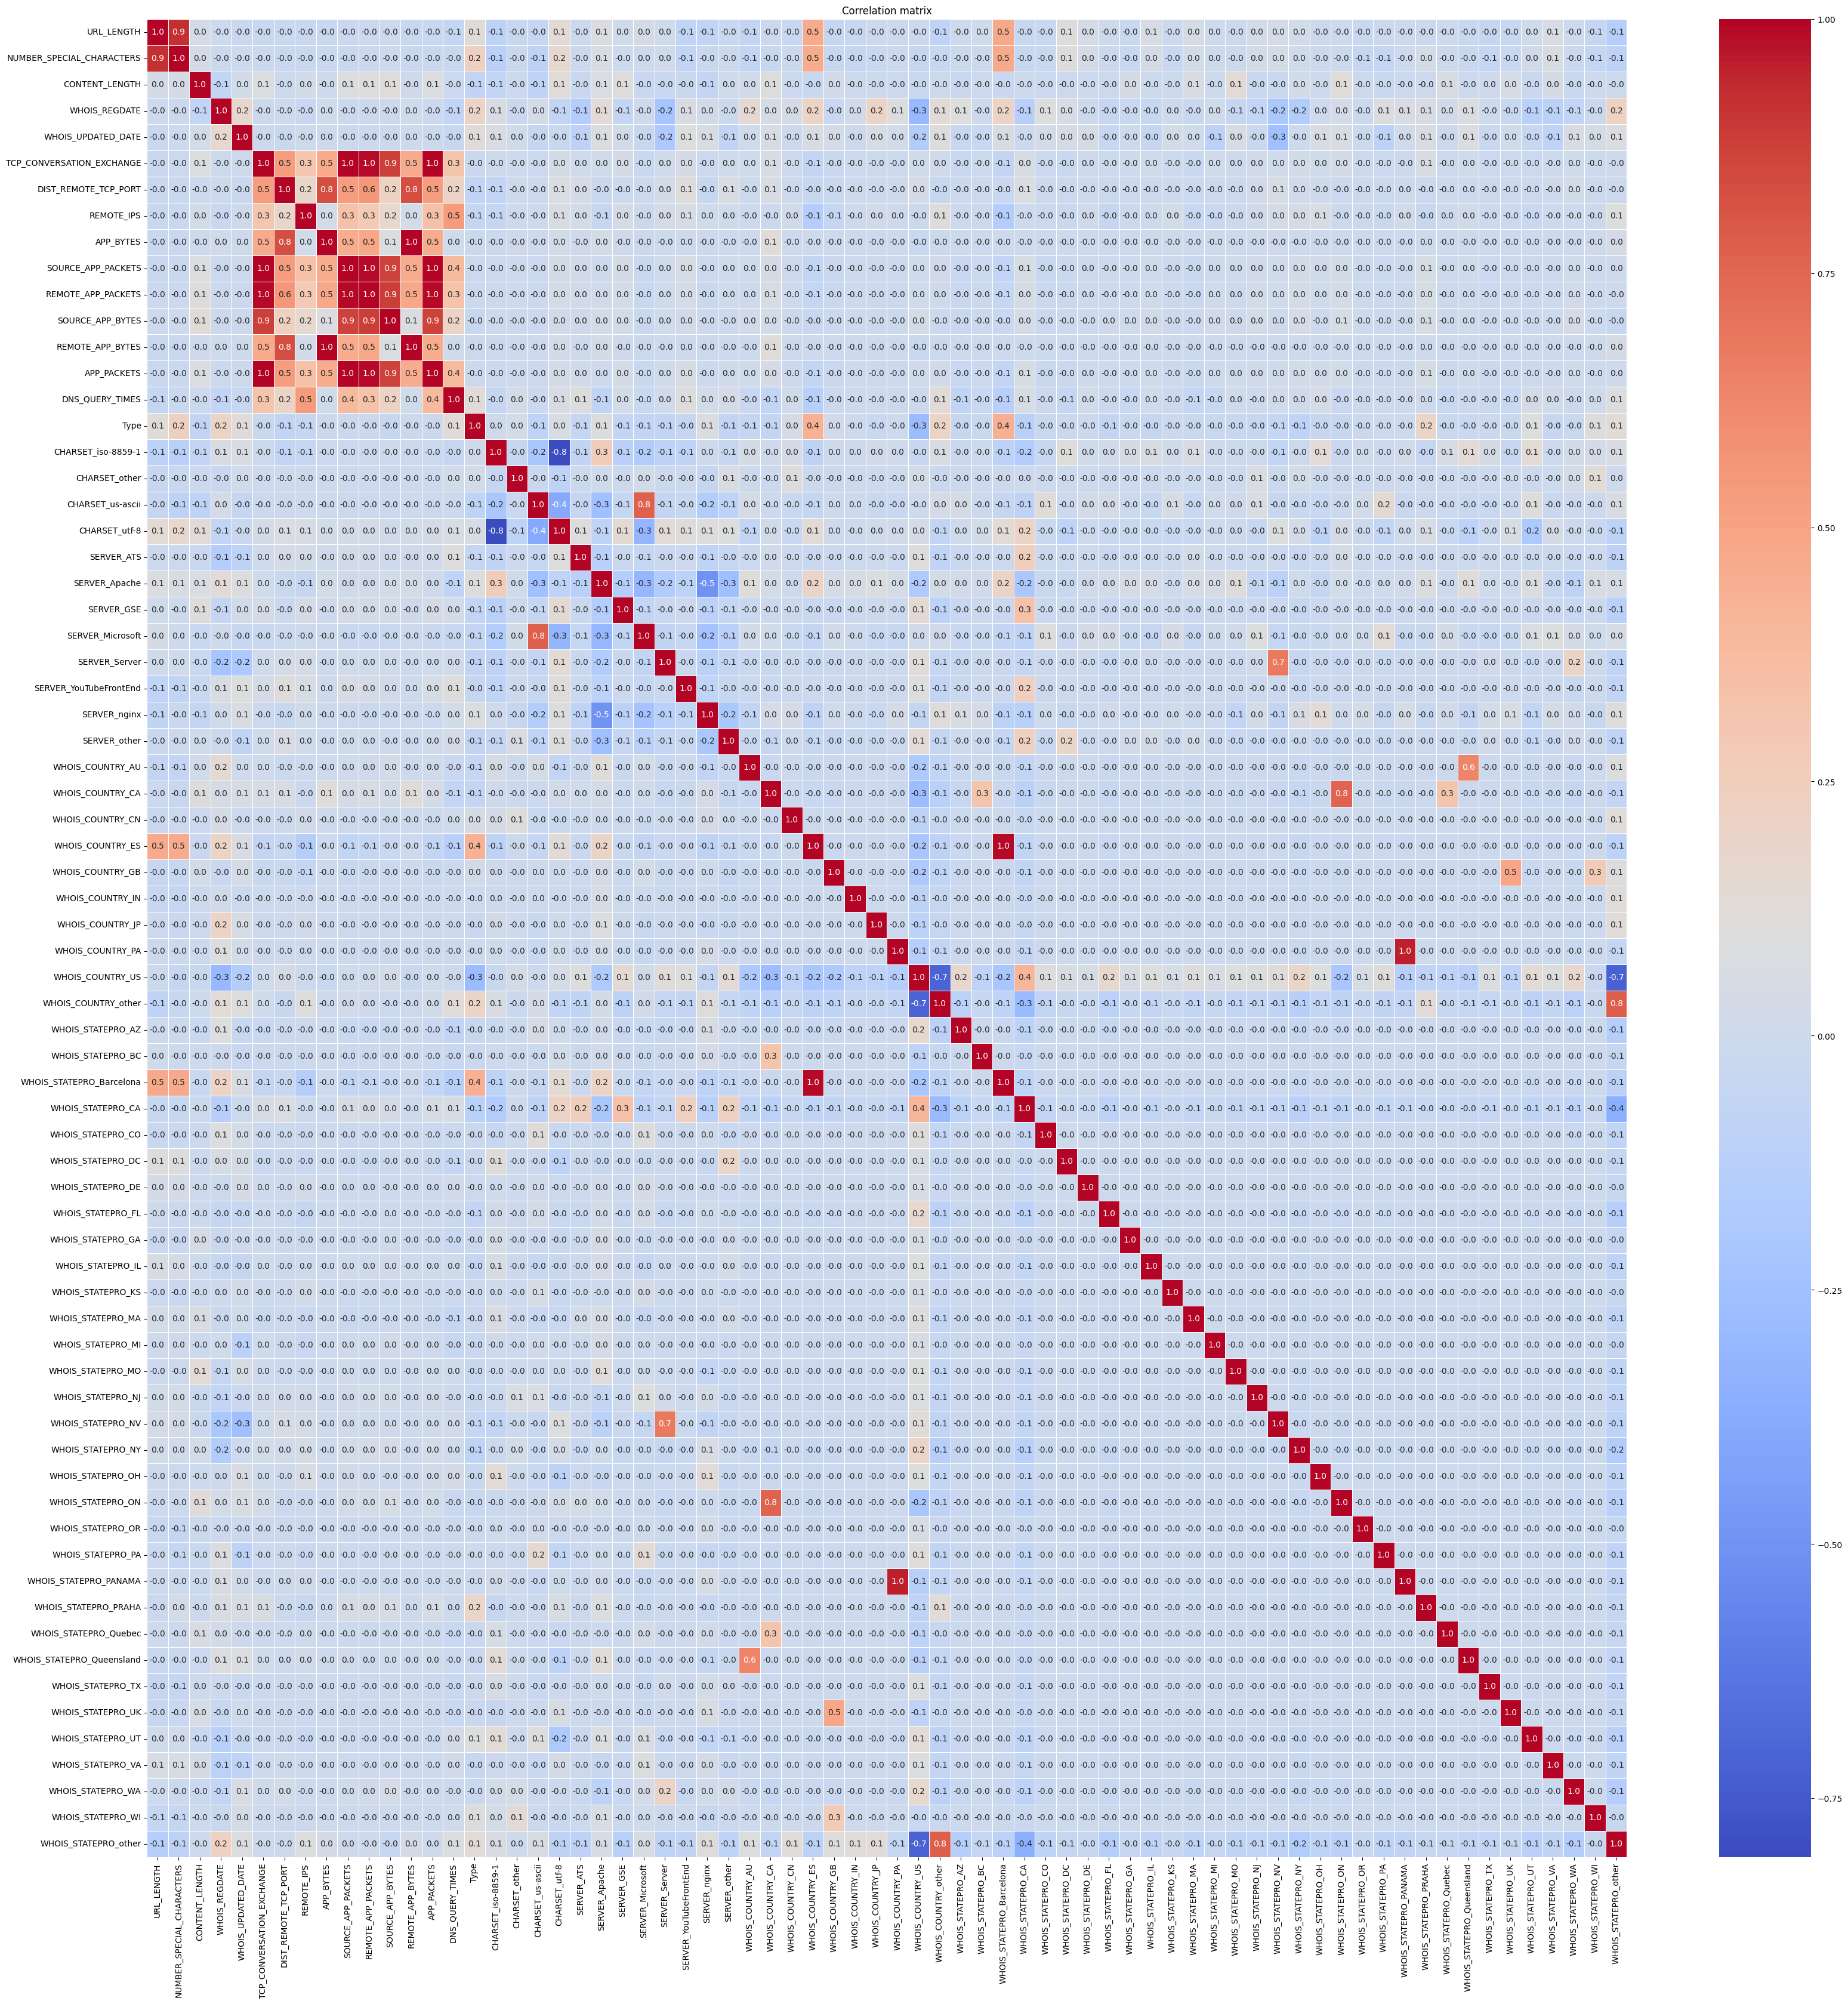

In [41]:
plt.figure(figsize = (40, 40))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidth = 0.5, fmt = '.1f')

plt.title('Correlation matrix')
plt.show()

# Training

In [42]:
y = data['Type']
X = data.drop(['Type'], axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [43]:
print("Shape of the X Train :", xtrain.shape)
print("Shape of the y Train :", ytrain.shape)
print("Shape of the X test :", xtest.shape)
print("Shape of the y test :", ytest.shape)

Shape of the X Train : (1169, 69)
Shape of the y Train : (1169,)
Shape of the X test : (390, 69)
Shape of the y test : (390,)


# Results

In [44]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)
pred_LR = LR.predict(xtest)

In [45]:
print(accuracy_score(ytest,pred_LR))
print('--------------------------')
print(confusion_matrix(ytest,pred_LR))
print('--------------------------')

print(classification_report(ytest,pred_LR))

0.9384615384615385
--------------------------
[[335   5]
 [ 19  31]]
--------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       340
           1       0.86      0.62      0.72        50

    accuracy                           0.94       390
   macro avg       0.90      0.80      0.84       390
weighted avg       0.94      0.94      0.93       390



Precision = TP / (TP + FP)  

Recall = TP / (TP + FN)   
It is the proportion of correctly predicted positive classes among all true positive classes. 

F1-score = 2 * (precision * recall) / (precision + recall)  
It is the harmonic mean of precision and recall. This is a metric that considers both sides of the coin - precision and recall.


Support is the number of true samples of each class in the test dataset.

macro avg - Calculates the average metric value for each class and then averages them without taking into account class imbalance.

weighted avg - calculates a weighted average of the metric for each class, taking into account the class size (support).

In [46]:
GNB = GaussianNB()
GNB.fit(xtrain, ytrain)
pred_GNB = GNB.predict(xtest)

In [52]:
print(accuracy_score(ytest,pred_GNB))
print('--------------------------')
print(confusion_matrix(ytest,pred_GNB))
print('--------------------------')

print(classification_report(ytest,pred_GNB))

0.4794871794871795
--------------------------
[[140 200]
 [  3  47]]
--------------------------
              precision    recall  f1-score   support

           0       0.98      0.41      0.58       340
           1       0.19      0.94      0.32        50

    accuracy                           0.48       390
   macro avg       0.58      0.68      0.45       390
weighted avg       0.88      0.48      0.55       390



In [53]:
kNN = KNeighborsClassifier()
kNN.fit(xtrain, ytrain)
pred_kNN = kNN.predict(xtest)

print(accuracy_score(ytest,pred_kNN))
print('--------------------------')
print(confusion_matrix(ytest,pred_kNN))
print('--------------------------')

print(classification_report(ytest,pred_kNN))

0.9256410256410257
--------------------------
[[323  17]
 [ 12  38]]
--------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       340
           1       0.69      0.76      0.72        50

    accuracy                           0.93       390
   macro avg       0.83      0.85      0.84       390
weighted avg       0.93      0.93      0.93       390



In [54]:
DT = DecisionTreeClassifier()
DT.fit(xtrain, ytrain)
pred_DT = DT.predict(xtest)

print(accuracy_score(ytest,pred_DT))
print('--------------------------')
print(confusion_matrix(ytest,pred_DT))
print('--------------------------')

print(classification_report(ytest,pred_DT))

0.9282051282051282
--------------------------
[[322  18]
 [ 10  40]]
--------------------------
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       340
           1       0.69      0.80      0.74        50

    accuracy                           0.93       390
   macro avg       0.83      0.87      0.85       390
weighted avg       0.93      0.93      0.93       390



In [55]:
RF = RandomForestClassifier()
RF.fit(xtrain, ytrain)
pred_RF = RF.predict(xtest)

print(accuracy_score(ytest,pred_RF))
print('--------------------------')
print(confusion_matrix(ytest,pred_RF))
print('--------------------------')

print(classification_report(ytest,pred_RF))

0.9538461538461539
--------------------------
[[333   7]
 [ 11  39]]
--------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       340
           1       0.85      0.78      0.81        50

    accuracy                           0.95       390
   macro avg       0.91      0.88      0.89       390
weighted avg       0.95      0.95      0.95       390



In [57]:
XGB = XGBClassifier()
XGB.fit(xtrain, ytrain)
pred_XGB = XGB.predict(xtest)

print(accuracy_score(ytest,pred_XGB))
print('--------------------------')
print(confusion_matrix(ytest,pred_XGB))
print('--------------------------')

print(classification_report(ytest,pred_XGB))

0.9641025641025641
--------------------------
[[334   6]
 [  8  42]]
--------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       340
           1       0.88      0.84      0.86        50

    accuracy                           0.96       390
   macro avg       0.93      0.91      0.92       390
weighted avg       0.96      0.96      0.96       390

